In [1]:
!pip install open_clip_torch
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.9 MB/s eta 0:00:00


In [22]:
!pip install -U torch torchvision torchaudio
!pip install -U transformers datasets pillow tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 165.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 146.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: pillow
    Found existing installation: pillow 11.3.0
    Uninstalling pillow-11.3.0:
      Successfully uninstalled pillow-11.3.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.2
    Uninstalling transformers-4.57.2:
      Successfully uninstalled transformers-4.57.2
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0

In [175]:
import numpy as np
import open_clip
import os
import pandas as pd
import random
import seaborn as sns
import torch
from datasets import load_dataset
from IPython.display import clear_output
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from tempfile import TemporaryDirectory
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from transformers import AutoModel, AutoProcessor
import matplotlib.pyplot as plt

In [2]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("imageomics/invasive_plants_hawaii", name="full", split="both")

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/46 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/46 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/32 [00:00<?, ?it/s]

In [3]:
ds

Dataset({
    features: ['session', 'filename', 'sampling_type', 'image', 'site', 'day', 'plant', 'level', 'view', 'healthy', 'rust', 'leaf_miner', 'other_insect', 'mechanical_damage', 'other_remarks', 'expert_healthy', 'expert_rust', 'expert_leaf_miner', 'expert_other_insect', 'expert_mechanical_damage', 'expert_confidence', 'expert_other_remarks', 'expert_notes'],
    num_rows: 1642
})

In [6]:
ds[0]

{'session': 'session_1_1_16_2025',
 'filename': 'DSC00752.png',
 'sampling_type': 'opportunistic',
 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=6000x4000>,
 'site': 1,
 'day': 16,
 'plant': 'exp',
 'level': 'nan',
 'view': 'D',
 'healthy': 'No',
 'rust': 'Yes',
 'leaf_miner': 'No',
 'other_insect': 'No',
 'mechanical_damage': 'No'}

In [5]:
expert_cols = [ 'other_remarks', 'expert_healthy', 'expert_rust', 'expert_leaf_miner', 'expert_other_insect', 'expert_mechanical_damage', 'expert_confidence',  'expert_other_remarks', 'expert_notes' ]
ds = ds.remove_columns(expert_cols)

In [66]:
# Create Train/Val/Test Split 80-10-10
ds_splits = ds.train_test_split(test_size=0.2, seed=42)
train_ds = ds_splits["train"]
test_ds  = ds_splits["test"]
ds_splits2 = test_ds.train_test_split(test_size=0.5, seed=42)
test_ds  = ds_splits2["test"]
val_ds   = ds_splits2["train"]

In [69]:
train_ds

Dataset({
    features: ['session', 'filename', 'sampling_type', 'image', 'site', 'day', 'plant', 'level', 'view', 'healthy', 'rust', 'leaf_miner', 'other_insect', 'mechanical_damage', 'label'],
    num_rows: 1313
})

In [68]:
val_ds

Dataset({
    features: ['session', 'filename', 'sampling_type', 'image', 'site', 'day', 'plant', 'level', 'view', 'healthy', 'rust', 'leaf_miner', 'other_insect', 'mechanical_damage', 'label'],
    num_rows: 164
})

In [67]:
test_ds

Dataset({
    features: ['session', 'filename', 'sampling_type', 'image', 'site', 'day', 'plant', 'level', 'view', 'healthy', 'rust', 'leaf_miner', 'other_insect', 'mechanical_damage', 'label'],
    num_rows: 165
})

## Load BioCLIP

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model, preprocess_train, preprocess_val = open_clip.create_model_and_transforms('hf-hub:imageomics/bioclip')
tokenizer = open_clip.get_tokenizer('hf-hub:imageomics/bioclip')

In [29]:
model.to(device).eval()

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-11): 12 x ResidualAttentionBlock(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): GELU(approximate='none')
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((768,), eps=1e-05, elementwise_affine

## Zero-Shot Classification

In [37]:
damages = [
    "healthy",
    "rust",
    "leaf_miner",
    "other_insect",
    "mechanical_damage"
]

In [38]:
labels = {
    "healthy": "a healthy leaf with no visible damage",
    "rust": "a leaf with rust disease spots",
    "leaf_miner": "a leaf damaged by leaf miner insects",
    "other_insect": "a leaf damaged by insects",
    "mechanical_damage": "a leaf with mechanical or physical damage"
}

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [39]:
texts = [labels[l] for l in damages]
text_tokens = tokenizer(texts).to(device)

with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

In [42]:
all_scores = []
all_targets = []

for ex in tqdm(ds):
    # image
    image = preprocess_val(ex["image"]).unsqueeze(0).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)

        scores = (image_features @ text_features.T).squeeze(0)
        probs = torch.sigmoid(scores).cpu().numpy()

    all_scores.append(probs)

    # ground truth (yes=1, no or maybe = 0)
    gt = []
    for label in labels:
        val = ex.get(label, "No")
        gt.append(1 if val == "Yes" else 0)

    all_targets.append(gt)

100%|██████████| 1642/1642 [15:00<00:00,  1.82it/s]


In [43]:
y_pred_scores = np.array(all_scores)
y_true = np.array(all_targets).astype(int)

In [57]:
THRESHOLDS = {
    "healthy": 0.5,
    "rust": 0.45,
    "leaf_miner": 0.45,
    "other_insect": 0.45,
    "mechanical_damage": 0.45
}

threshold_vec = np.array([THRESHOLDS[l] for l in labels])
y_pred2 = (y_pred_scores >= threshold_vec).astype(int)

In [51]:
print("Micro F1:", f1_score(y_true, y_pred2, average="micro"))
print("Macro F1:", f1_score(y_true, y_pred2, average="macro"))
print("Micro Precision:", precision_score(y_true, y_pred2, average="micro"))
print("Micro Recall:", recall_score(y_true, y_pred2, average="micro", zero_division=0))

print(classification_report(y_true, y_pred2, target_names=labels, zero_division=0))

Micro F1: 0.4027237354085603
Macro F1: 0.39329379603694903
Micro Precision: 0.25213154689403167
Micro Recall: 1.0
                   precision    recall  f1-score   support

          healthy       0.19      1.00      0.32       314
             rust       0.45      1.00      0.62       744
       leaf_miner       0.21      1.00      0.34       341
     other_insect       0.22      1.00      0.36       366
mechanical_damage       0.19      1.00      0.31       305

        micro avg       0.25      1.00      0.40      2070
        macro avg       0.25      1.00      0.39      2070
     weighted avg       0.29      1.00      0.44      2070
      samples avg       0.25      0.95      0.39      2070



In [54]:
# Show random example
i = 13
print("Ground truth:", y_true[i])

for label, score in zip(labels, y_pred_scores[i]):
    print(f"{label:20s}  {score:.3f}")


Ground truth: [0 1 0 0 0]
healthy               0.553
rust                  0.537
leaf_miner            0.561
other_insect          0.562
mechanical_damage     0.536


## Few-Shot Classification

In [58]:
# freeze bioclip
for param in model.parameters():
    param.requires_grad = False

In [85]:
class LeafDamageDataset(Dataset):
    def __init__(self, hf_dataset, preprocess):
        self.ds = hf_dataset
        self.preprocess = preprocess

    def __len__(self):
        return len(self.ds)

    def __getitem__(self, idx):
        ex = self.ds[idx]

        image = self.preprocess(ex["image"])

        labels = [
            1.0 if ex.get(label, "No") == "Yes" else 0.0
            for label in damages
        ]

        return image, torch.tensor(labels)

In [127]:
class LeafDamageDataset(Dataset):
    def __init__(self, hf_dataset, preprocess, use_yolo=False):
        self.ds = hf_dataset
        self.preprocess = preprocess
        self.use_yolo = use_yolo

    def __len__(self):
        return len(self.ds)

    def __getitem__(self, idx):
        ex = self.ds[idx]

        image = ex["image"]

        # yolo crop
        if self.use_yolo:
            cache_key = f"{ex['session']}::{ex['filename']}"
            image = crop_with_yolo_most_green(image, cache_key)

        # bioclip preprocess
        image = self.preprocess(image)

        labels = torch.tensor(
            [1.0 if ex.get(k, "No") == "Yes" else 0.0 for k in damages],
            dtype=torch.float32
        )

        return image, labels

In [86]:
train_ds_l = LeafDamageDataset(train_ds, preprocess_train)
val_ds_l   = LeafDamageDataset(val_ds, preprocess_val)
test_ds_l   = LeafDamageDataset(test_ds, preprocess_val)

In [87]:
train_loader = DataLoader(
    train_ds_l,
    batch_size=16,
    shuffle=True,
    num_workers=2
)

val_loader = DataLoader(
    val_ds_l,
    batch_size=16,
    shuffle=False,
    num_workers=2
)

test_loader = DataLoader(
    test_ds_l,
    batch_size=16,
    shuffle=False,
    num_workers=2
)

### Test 1: Basic BCE w/ One Classifier layer

In [74]:
embedding_dim = model.visual.output_dim

classifier = torch.nn.Linear(embedding_dim, len(labels))
classifier = classifier.to(device)

In [76]:
# BCE optimizer
criterion = torch.nn.BCEWithLogitsLoss()

optimizer = torch.optim.AdamW(
    classifier.parameters(),
    lr=1e-3,
    weight_decay=1e-4
)

In [88]:
EPOCHS = 10

for epoch in range(EPOCHS):
    classifier.train()
    total_loss = 0.0

    for images, targets in tqdm(train_loader):
        images = images.to(device)
        targets = targets.to(device)

        with torch.no_grad():
            features = model.encode_image(images)
            features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier(features)
        loss = criterion(logits, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}: Train Loss = {avg_loss:.4f}")


100%|██████████| 83/83 [05:59<00:00,  4.33s/it]


Epoch 1: Train Loss = 0.6150


100%|██████████| 83/83 [06:05<00:00,  4.40s/it]


Epoch 2: Train Loss = 0.5447


100%|██████████| 83/83 [06:08<00:00,  4.44s/it]


Epoch 3: Train Loss = 0.5277


100%|██████████| 83/83 [06:06<00:00,  4.41s/it]


Epoch 4: Train Loss = 0.5201


100%|██████████| 83/83 [06:00<00:00,  4.34s/it]


Epoch 5: Train Loss = 0.5130


100%|██████████| 83/83 [06:03<00:00,  4.38s/it]


Epoch 6: Train Loss = 0.5069


100%|██████████| 83/83 [06:07<00:00,  4.43s/it]


Epoch 7: Train Loss = 0.5013


100%|██████████| 83/83 [06:02<00:00,  4.37s/it]


Epoch 8: Train Loss = 0.4939


100%|██████████| 83/83 [06:04<00:00,  4.39s/it]


Epoch 9: Train Loss = 0.4913


100%|██████████| 83/83 [06:02<00:00,  4.37s/it]

Epoch 10: Train Loss = 0.4864


In [97]:
classifier.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for images, targets in val_loader:
        images = images.to(device)
        targets = targets.to(device)

        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier(features)
        probs = torch.sigmoid(logits)

        all_preds.append(probs.cpu().numpy())
        all_targets.append(targets.cpu().numpy())

y_pred = np.concatenate(all_preds, axis=0)
y_true = np.concatenate(all_targets, axis=0)

y_bin = (y_pred >= 0.5).astype(int)

# pretend anything blank is healthy
healthy_index = damages.index("healthy")
for i in range(len(y_bin)):
    if y_bin[i].sum() == 0:  # no label predicted
        y_bin[i][healthy_index] = 1

print("Micro F1:", f1_score(y_true, y_bin, average="micro"))
print("Macro F1:", f1_score(y_true, y_bin, average="macro"))

Micro F1: 0.31868131868131866
Macro F1: 0.17590090090090088


In [99]:
print(classification_report(y_true, y_bin, target_names=damages, zero_division=0))

                   precision    recall  f1-score   support

          healthy       0.25      0.79      0.38        38
             rust       0.67      0.41      0.50        69
       leaf_miner       0.00      0.00      0.00        24
     other_insect       0.00      0.00      0.00        42
mechanical_damage       0.00      0.00      0.00        27

        micro avg       0.35      0.29      0.32       200
        macro avg       0.18      0.24      0.18       200
     weighted avg       0.28      0.29      0.25       200
      samples avg       0.35      0.32      0.33       200



In [96]:
# show random samples
num_examples = 5

indices = random.sample(range(len(y_true)), num_examples)

for i in indices:
    true_labels = [damages[j] for j, v in enumerate(y_true[i]) if v == 1]
    pred_labels = [damages[j] for j, v in enumerate(y_bin[i]) if v == 1]
    if len(pred_labels) == 0:
        pred_labels = ["healthy"]

    print(f"Example {i}:")
    print(f"  True labels: {true_labels}")
    print(f"  Predicted labels: {pred_labels}")
    print("---")


Example 67:
  True labels: ['rust']
  Predicted labels: ['healthy']
---
Example 139:
  True labels: ['rust', 'leaf_miner']
  Predicted labels: ['healthy']
---
Example 156:
  True labels: ['rust', 'leaf_miner', 'other_insect']
  Predicted labels: ['rust']
---
Example 37:
  True labels: ['healthy']
  Predicted labels: ['healthy']
---
Example 17:
  True labels: ['rust']
  Predicted labels: ['rust']
---


### Test 2: Weighted BCE w/ One Classifier layer

In [102]:
def compute_class_weights(ds, keys):
    counts = np.zeros(len(keys))
    for ex in ds:
        for i, k in enumerate(keys):
            if ex[k] == "Yes":
                counts[i] += 1
    total_samples = len(ds)

    pos_weight = torch.tensor([(total_samples - c) / (c + 1e-5) for c in counts], dtype=torch.float32)
    return pos_weight

pos_weight = compute_class_weights(ds, damages).to("cuda")

criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)

In [103]:
classifier2 = torch.nn.Linear(embedding_dim, len(labels))
classifier2 = classifier2.to(device)

In [ ]:
optimizer2 = torch.optim.AdamW(
    classifier2.parameters(),
    lr=1e-3,
    weight_decay=1e-4
)

In [104]:
# v1
classifier2.train()
for epoch in range(5):
    total_loss = 0.0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        optimizer2.zero_grad()
        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier2(features)
        loss = criterion(logits, targets)
        loss.backward()
        optimizer2.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

Epoch 1, Loss: 1.0358683883425701
Epoch 2, Loss: 1.0359145977410926
Epoch 3, Loss: 1.0360420963850365
Epoch 4, Loss: 1.040698648935341
Epoch 5, Loss: 1.0362630579845016


In [122]:
# a few more epochs
classifier2.train()
for epoch in range(5):
    total_loss = 0.0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        optimizer.zero_grad()
        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier2(features)
        loss = criterion(logits, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+6}, Loss: {total_loss / len(train_loader)}")

Epoch 6, Loss: 1.037385465150856
Epoch 7, Loss: 1.0361057275749115
Epoch 8, Loss: 1.0366387941751136
Epoch 9, Loss: 1.0370706772229759
Epoch 10, Loss: 1.036503872239446


In [108]:
classifier2.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for images, targets in val_loader:
        images = images.to(device)
        targets = targets.to(device)

        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier2(features)
        probs = torch.sigmoid(logits)

        all_preds.append(probs.cpu().numpy())
        all_targets.append(targets.cpu().numpy())

y_pred2 = np.concatenate(all_preds, axis=0)
y_true2 = np.concatenate(all_targets, axis=0)

y_bin2 = (y_pred2 >= 0.4).astype(int)

healthy_index = damages.index("healthy")
for i in range(len(y_bin)):
    if y_bin2[i].sum() == 0:  # no label predicted
        y_bin2[i][healthy_index] = 1

print("Micro F1:", f1_score(y_true2, y_bin2, average="micro"))
print("Macro F1:", f1_score(y_true2, y_bin2, average="macro"))

Micro F1: 0.39215686274509803
Macro F1: 0.3828641908380804


In [125]:
print(classification_report(y_true2, y_bin2, target_names=damages, zero_division=0))

                   precision    recall  f1-score   support

          healthy       0.23      1.00      0.38        38
             rust       0.42      1.00      0.59        69
       leaf_miner       0.15      1.00      0.26        24
     other_insect       0.26      1.00      0.41        42
mechanical_damage       0.16      1.00      0.28        27

        micro avg       0.24      1.00      0.39       200
        macro avg       0.24      1.00      0.38       200
     weighted avg       0.28      1.00      0.43       200
      samples avg       0.24      0.96      0.38       200



### Test 3: Weighted BCE and YOLO cropping

In [112]:
!pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.8 MB/s eta 0:00:00


In [113]:
import cv2
from ultralytics import YOLO
from PIL import Image, ImageFile, UnidentifiedImageError

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [115]:
USE_YOLO = True # set True to enable YOLO+green cropping
YOLO_CONF_THRESHOLD = 0.55
YOLO_MIN_GREEN = 0.3 # e.g. 0.5 if you want mostly-green boxes only
YOLO_PAD_RATIO = 0.05 # padding around bounding box

In [116]:
yolo_model = YOLO("yolov8x.pt")

In [117]:
crop_cache = {}

def green_fraction(pil_img: Image.Image) -> float:
    """Compute fraction of 'green' pixels in a PIL RGB image using HSV thresholding."""
    arr = np.array(pil_img.convert("RGB"))
    hsv = cv2.cvtColor(arr, cv2.COLOR_RGB2HSV)

    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])

    mask = cv2.inRange(hsv, lower_green, upper_green)
    if mask.size == 0:
        return 0.0

    green_pixels = mask > 0
    return float(green_pixels.mean())

def crop_with_yolo_most_green(pil_img: Image.Image, cache_key: str | None = None) -> Image.Image:
    """Run YOLO once per image (cached by path), crop to most-green box, else return original."""
    if cache_key is not None and cache_key in crop_cache:
        x1p, y1p, x2p, y2p = crop_cache[cache_key]
        return pil_img.crop((x1p, y1p, x2p, y2p))

    w, h = pil_img.size
    results = yolo_model(pil_img, verbose=False)
    if len(results) == 0 or results[0].boxes is None or len(results[0].boxes) == 0:
        return pil_img

    boxes = results[0].boxes
    best_crop = None
    best_green = -1.0
    best_coords = None

    for box in boxes:
        xyxy = box.xyxy[0].cpu().numpy()
        conf = float(box.conf.cpu().item())
        if conf < YOLO_CONF_THRESHOLD:
            continue

        x1, y1, x2, y2 = map(int, xyxy)
        bw = x2 - x1
        bh = y2 - y1
        pad_w = int(bw * YOLO_PAD_RATIO)
        pad_h = int(bh * YOLO_PAD_RATIO)

        x1p = max(0, x1 - pad_w)
        y1p = max(0, y1 - pad_h)
        x2p = min(w, x2 + pad_w)
        y2p = min(h, y2 + pad_h)

        crop = pil_img.crop((x1p, y1p, x2p, y2p))
        gf = green_fraction(crop)

        if gf >= YOLO_MIN_GREEN and gf > best_green:
            best_green = gf
            best_crop = crop
            best_coords = (x1p, y1p, x2p, y2p)

    if best_crop is None:
        return pil_img

    if cache_key is not None:
        crop_cache[cache_key] = best_coords
    return best_crop



In [128]:
train_ds_2 = LeafDamageDataset(train_ds, preprocess_train, True)
val_ds_2   = LeafDamageDataset(val_ds, preprocess_val, True)

In [129]:
train_loader2 = DataLoader(
    train_ds_2,
    batch_size=16,
    shuffle=True,
    num_workers=2
)

val_loader2 = DataLoader(
    val_ds_2,
    batch_size=16,
    shuffle=False,
    num_workers=2
)

In [130]:
embedding_dim2 = model.visual.output_dim

classifier3 = torch.nn.Linear(embedding_dim2, len(labels))
classifier3 = classifier3.to(device)

In [131]:
# BCE optimizer
criterion = torch.nn.BCEWithLogitsLoss()

optimizer3 = torch.optim.AdamW(
    classifier3.parameters(),
    lr=1e-3,
    weight_decay=1e-4
)

In [132]:
EPOCHS = 15

for epoch in range(EPOCHS):
    classifier3.train()
    total_loss = 0.0

    for images, targets in tqdm(train_loader2):
        images = images.to(device)
        targets = targets.to(device)

        with torch.no_grad():
            features = model.encode_image(images)
            features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier3(features)
        loss = criterion(logits, targets)

        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader2)
    print(f"Epoch {epoch+1}: Train Loss = {avg_loss:.4f}")


100%|██████████| 83/83 [05:51<00:00,  4.23s/it]


Epoch 1: Train Loss = 0.6120


100%|██████████| 83/83 [05:50<00:00,  4.22s/it]


Epoch 2: Train Loss = 0.5436


100%|██████████| 83/83 [05:52<00:00,  4.25s/it]


Epoch 3: Train Loss = 0.5253


100%|██████████| 83/83 [05:52<00:00,  4.25s/it]


Epoch 4: Train Loss = 0.5194


100%|██████████| 83/83 [05:56<00:00,  4.30s/it]


Epoch 5: Train Loss = 0.5136


100%|██████████| 83/83 [05:53<00:00,  4.26s/it]


Epoch 6: Train Loss = 0.5038


100%|██████████| 83/83 [05:53<00:00,  4.26s/it]


Epoch 7: Train Loss = 0.5023


100%|██████████| 83/83 [05:54<00:00,  4.27s/it]


Epoch 8: Train Loss = 0.4930


100%|██████████| 83/83 [05:51<00:00,  4.23s/it]


Epoch 9: Train Loss = 0.4907


100%|██████████| 83/83 [05:50<00:00,  4.23s/it]


Epoch 10: Train Loss = 0.4852


100%|██████████| 83/83 [05:52<00:00,  4.24s/it]


Epoch 11: Train Loss = 0.4827


100%|██████████| 83/83 [05:50<00:00,  4.22s/it]


Epoch 12: Train Loss = 0.4745


100%|██████████| 83/83 [05:49<00:00,  4.21s/it]


Epoch 13: Train Loss = 0.4717


100%|██████████| 83/83 [05:49<00:00,  4.21s/it]


Epoch 14: Train Loss = 0.4706


100%|██████████| 83/83 [05:50<00:00,  4.22s/it]

Epoch 15: Train Loss = 0.4677


In [133]:
classifier3.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for images, targets in val_loader:
        images = images.to(device)
        targets = targets.to(device)

        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier3(features)
        probs = torch.sigmoid(logits)

        all_preds.append(probs.cpu().numpy())
        all_targets.append(targets.cpu().numpy())

y_pred4 = np.concatenate(all_preds, axis=0)
y_true4 = np.concatenate(all_targets, axis=0)

y_bin4 = (y_pred4 >= 0.4).astype(int)

healthy_index = damages.index("healthy")
for i in range(len(y_bin4)):
    if y_bin4[i].sum() == 0:  # no label predicted
        y_bin4[i][healthy_index] = 1

print("Micro F1:", f1_score(y_true4, y_bin4, average="micro"))
print("Macro F1:", f1_score(y_true4, y_bin4, average="macro"))

print(classification_report(y_true4, y_bin4, target_names=damages, zero_division=0))

Micro F1: 0.48533333333333334
Macro F1: 0.3049894419306184
                   precision    recall  f1-score   support

          healthy       0.43      0.53      0.47        38
             rust       0.53      0.90      0.67        69
       leaf_miner       1.00      0.04      0.08        24
     other_insect       0.80      0.19      0.31        42
mechanical_damage       0.00      0.00      0.00        27

        micro avg       0.52      0.46      0.49       200
        macro avg       0.55      0.33      0.30       200
     weighted avg       0.55      0.46      0.39       200
      samples avg       0.52      0.44      0.46       200



In [137]:
def show_yolo_crop_example(hf_ds, idx=None):
    if idx is None:
        idx = random.randint(0, len(hf_ds) - 1)

    ex = hf_ds[idx]
    img = ex["image"]
    crop = crop_with_yolo_most_green(
        img,
        cache_key=f"{ex['session']}::{ex['filename']}"
    )

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(crop)
    plt.title("YOLO crop")
    plt.axis("off")

    plt.show()


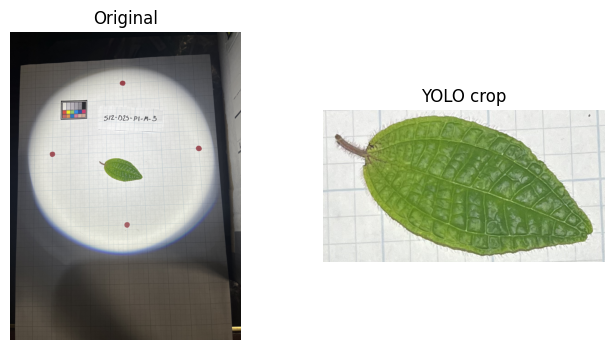

In [138]:
show_yolo_crop_example(val_ds)

### Test 4: Cropping and Normal BCE w/ One Classifier Layer

In [139]:
classifier4 = torch.nn.Linear(embedding_dim, len(labels))
classifier4 = classifier4.to(device)

In [140]:
optimizer4 = torch.optim.AdamW(
    classifier4.parameters(),
    lr=1e-4,
    weight_decay=1e-3
)

In [143]:
# v1
classifier4.train()
for epoch in range(15):
    total_loss = 0.0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        optimizer.zero_grad()
        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier4(features)
        loss = criterion(logits, targets)
        loss.backward()
        optimizer4.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

Epoch 1, Loss: 0.6661255022129381
Epoch 2, Loss: 0.6310716551470469
Epoch 3, Loss: 0.601440294679389
Epoch 4, Loss: 0.5771744947835623
Epoch 5, Loss: 0.5588871527867145
Epoch 6, Loss: 0.5433229821992208
Epoch 7, Loss: 0.5341812982616654
Epoch 8, Loss: 0.5311073194067162
Epoch 9, Loss: 0.5248629371803927
Epoch 10, Loss: 0.5278290987732899
Epoch 11, Loss: 0.5283545234117163
Epoch 12, Loss: 0.5302424883267965
Epoch 13, Loss: 0.5330176856144365
Epoch 14, Loss: 0.5349462833031114
Epoch 15, Loss: 0.538175949490214


In [144]:
classifier4.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for images, targets in val_loader:
        images = images.to(device)
        targets = targets.to(device)

        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier4(features)
        probs = torch.sigmoid(logits)

        all_preds.append(probs.cpu().numpy())
        all_targets.append(targets.cpu().numpy())

y_pred4 = np.concatenate(all_preds, axis=0)
y_true4 = np.concatenate(all_targets, axis=0)

y_bin4 = (y_pred4 >= 0.4).astype(int)

healthy_index = damages.index("healthy")
for i in range(len(y_bin4)):
    if y_bin4[i].sum() == 0:  # no label predicted
        y_bin4[i][healthy_index] = 1

print("Micro F1:", f1_score(y_true4, y_bin4, average="micro"))
print("Macro F1:", f1_score(y_true4, y_bin4, average="macro"))

print(classification_report(y_true4, y_bin4, target_names=damages, zero_division=0))

Micro F1: 0.4010989010989011
Macro F1: 0.18486286919831224
                   precision    recall  f1-score   support

          healthy       0.27      0.29      0.28        38
             rust       0.50      0.90      0.65        69
       leaf_miner       0.00      0.00      0.00        24
     other_insect       0.00      0.00      0.00        42
mechanical_damage       0.00      0.00      0.00        27

        micro avg       0.45      0.36      0.40       200
        macro avg       0.15      0.24      0.18       200
     weighted avg       0.22      0.36      0.28       200
      samples avg       0.45      0.34      0.37       200



### Test 5: Basic BCE w/ Multi-layer Classification Head

(Best Result)

In [145]:
classifier5 = torch.nn.Sequential(
    torch.nn.Linear(embedding_dim, 512),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(512, len(labels))
).to(device)

optimizer5 = torch.optim.AdamW(
    classifier5.parameters(),
    lr=1e-4,
    weight_decay=1e-3
)

In [146]:
# v1
classifier5.train()
for epoch in range(15):
    total_loss = 0.0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        optimizer5.zero_grad()
        features = model.encode_image(images)
        features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier5(features)
        loss = criterion(logits, targets)
        loss.backward()
        optimizer5.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

Epoch 1, Loss: 0.6356169279799404
Epoch 2, Loss: 0.5556916289300804
Epoch 3, Loss: 0.5702673516359674
Epoch 4, Loss: 0.5285872899624239
Epoch 5, Loss: 0.5393123217375881
Epoch 6, Loss: 0.5065595658428698
Epoch 7, Loss: 0.5030072115990053
Epoch 8, Loss: 0.4880068646856101
Epoch 9, Loss: 0.47833957945007877
Epoch 10, Loss: 0.4661267794758441
Epoch 11, Loss: 0.448668076690421
Epoch 12, Loss: 0.43273940107908593
Epoch 13, Loss: 0.4303135598998472
Epoch 14, Loss: 0.40804917823119335
Epoch 15, Loss: 0.4214030051805887


In [166]:
# Rewrote the get stats function to not constantly duplicate my stats code (:

def get_stats(curr_classifier, loader):
  curr_classifier.eval()
  all_preds = []
  all_targets = []

  with torch.no_grad():
      for images, targets in loader:
          images = images.to(device)
          targets = targets.to(device)

          features = model.encode_image(images)
          features = features / features.norm(dim=-1, keepdim=True)

          logits = curr_classifier(features)
          probs = torch.sigmoid(logits)

          all_preds.append(probs.cpu().numpy())
          all_targets.append(targets.cpu().numpy())

  y_pred = np.concatenate(all_preds, axis=0)
  y_true = np.concatenate(all_targets, axis=0)

  y_bin = (y_pred >= 0.4).astype(int)

  healthy_index = damages.index("healthy")
  for i in range(len(y_bin)):
      if y_bin[i].sum() == 0:  # no label predicted
          y_bin[i][healthy_index] = 1

  print("Micro F1:", f1_score(y_true, y_bin, average="micro"))
  print("Macro F1:", f1_score(y_true, y_bin, average="macro"))

  print(classification_report(y_true, y_bin, target_names=damages, zero_division=0, digits=3))

  print("\nPer-class ROC AUC:")
  for i, label in enumerate(damages):
      if y_true[:, i].sum() > 0:
          auc = roc_auc_score(y_true[:, i], y_pred[:, i])
          print(f"{label:20s}: {auc:.4f}")
      else:
          print(f"{label:20s}: skipped (no positives)")

In [168]:
get_stats(classifier5, val_loader)

Micro F1: 0.565947242206235
Macro F1: 0.50358052379105
                   precision    recall  f1-score   support

          healthy      0.438     0.842     0.577        38
             rust      0.547     0.841     0.663        69
       leaf_miner      0.643     0.375     0.474        24
     other_insect      0.923     0.286     0.436        42
mechanical_damage      0.636     0.259     0.368        27

        micro avg      0.544     0.590     0.566       200
        macro avg      0.638     0.521     0.504       200
     weighted avg      0.629     0.590     0.536       200
      samples avg      0.567     0.586     0.551       200


Per-class ROC AUC:
healthy             : 0.8747
rust                : 0.8003
leaf_miner          : 0.8896
other_insect        : 0.9169
mechanical_damage   : 0.8024


In [178]:
# Replaces basic-f1 with 0.5 threshold for everything with custom thresholds per class

def get_stats_with_f1(curr_classifier, loader, threshold_grid=100):
    curr_classifier.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for images, targets in loader:
            images = images.to(device)
            targets = targets.to(device)

            features = model.encode_image(images)
            features = features / features.norm(dim=-1, keepdim=True)

            logits = curr_classifier(features)
            probs = torch.sigmoid(logits)

            all_preds.append(probs.cpu().numpy())
            all_targets.append(targets.cpu().numpy())

    y_pred = np.concatenate(all_preds, axis=0)
    y_true = np.concatenate(all_targets, axis=0)

    # per-class F1-optimal thresholds
    thresholds = np.linspace(0.0, 1.0, threshold_grid)
    best_thresholds = np.zeros(y_true.shape[1])

    for i in range(y_true.shape[1]):
        if y_true[:, i].sum() == 0:
            best_thresholds[i] = 0.5
            continue

        f1_scores = []
        for t in thresholds:
            y_bin = (y_pred[:, i] >= t).astype(int)
            f1_scores.append(f1_score(y_true[:, i], y_bin))
        best_thresholds[i] = thresholds[np.argmax(f1_scores)]

    y_bin_opt = (y_pred >= best_thresholds).astype(int)

    # healthy default
    healthy_index = damages.index("healthy")
    for i in range(len(y_bin_opt)):
        if y_bin_opt[i].sum() == 0:
            y_bin_opt[i][healthy_index] = 1

    print("Per-class optimal thresholds:", dict(zip(damages, best_thresholds.round(3))))
    print("Micro F1:", f1_score(y_true, y_bin_opt, average="micro"))
    print("Macro F1:", f1_score(y_true, y_bin_opt, average="macro"))
    print(classification_report(y_true, y_bin_opt, target_names=damages, zero_division=0, digits=3))

    print("\nPer-class ROC AUC:")
    for i, label in enumerate(damages):
        if y_true[:, i].sum() > 0:
            auc = roc_auc_score(y_true[:, i], y_pred[:, i])
            print(f"{label:20s}: {auc:.4f}")
        else:
            print(f"{label:20s}: skipped (no positives)")


In [171]:
get_stats_with_f1(classifier5, val_loader)

Per-class optimal thresholds: {'healthy': np.float64(0.586), 'rust': np.float64(0.515), 'leaf_miner': np.float64(0.343), 'other_insect': np.float64(0.141), 'mechanical_damage': np.float64(0.253)}
Micro F1: 0.6681818181818182
Macro F1: 0.6478732661739109
                   precision    recall  f1-score   support

          healthy      0.536     0.789     0.638        38
             rust      0.640     0.797     0.710        69
       leaf_miner      0.600     0.625     0.612        24
     other_insect      0.762     0.762     0.762        42
mechanical_damage      0.484     0.556     0.517        27

        micro avg      0.613     0.735     0.668       200
        macro avg      0.604     0.706     0.648       200
     weighted avg      0.620     0.735     0.669       200
      samples avg      0.618     0.696     0.633       200


Per-class ROC AUC:
healthy             : 0.8747
rust                : 0.8003
leaf_miner          : 0.8896
other_insect        : 0.9169
mechanical_damage

In [180]:
get_stats_with_f1(classifier5, test_loader)

Per-class optimal thresholds: {'healthy': np.float64(0.475), 'rust': np.float64(0.465), 'leaf_miner': np.float64(0.242), 'other_insect': np.float64(0.071), 'mechanical_damage': np.float64(0.222)}
Micro F1: 0.6470588235294118
Macro F1: 0.6160139735097144
                   precision    recall  f1-score   support

          healthy      0.597     0.889     0.714        45
             rust      0.629     0.848     0.723        66
       leaf_miner      0.605     0.684     0.642        38
     other_insect      0.405     0.630     0.493        27
mechanical_damage      0.469     0.556     0.508        27

        micro avg      0.564     0.759     0.647       203
        macro avg      0.541     0.721     0.616       203
     weighted avg      0.566     0.759     0.647       203
      samples avg      0.621     0.742     0.652       203


Per-class ROC AUC:
healthy             : 0.8602
rust                : 0.7969
leaf_miner          : 0.8324
other_insect        : 0.8052
mechanical_damage

### Test 6: Include Validation in Fine Tuning

In [163]:
classifier6 = torch.nn.Sequential(
    torch.nn.Linear(embedding_dim, 512),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(0.3),
    torch.nn.Linear(512, len(labels))
).to(device)

optimizer6 = torch.optim.AdamW(
    classifier6.parameters(),
    lr=1e-4,
    weight_decay=1e-3
)

In [164]:
for epoch in range(15):
    classifier6.train()
    total_loss = 0.0
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        optimizer6.zero_grad()
        with torch.no_grad():
          features = model.encode_image(images)
          features = features / features.norm(dim=-1, keepdim=True)

        logits = classifier6(features)
        loss = criterion(logits, targets)
        loss.backward()
        optimizer6.step()
        total_loss += loss.item()

    classifier6.eval()
    val_loss = 0.0

    with torch.no_grad():
        for images, targets in val_loader:
            images = images.to(device)
            targets = targets.to(device)

            features = model.encode_image(images)
            features = features / features.norm(dim=-1, keepdim=True)

            logits = classifier6(features)
            loss = criterion(logits, targets)
            val_loss += loss.item()

    print(f"Epoch {epoch+1}, Train Loss: {total_loss / len(train_loader)}, Val Loss: {val_loss / len(val_loader)}")

Epoch 1, Train Loss: 0.6618753082780953, Val Loss: 0.6166020794348284
Epoch 2, Train Loss: 0.5767048827136856, Val Loss: 0.5438152605837042
Epoch 3, Train Loss: 0.5401837556477053, Val Loss: 0.5320464291355826
Epoch 4, Train Loss: 0.529946741210409, Val Loss: 0.5277738869190216
Epoch 5, Train Loss: 0.5273777627083193, Val Loss: 0.5228117839856581
Epoch 6, Train Loss: 0.5198872405362417, Val Loss: 0.516574041409926
Epoch 7, Train Loss: 0.5172022947345871, Val Loss: 0.5111825168132782
Epoch 8, Train Loss: 0.5084631443023682, Val Loss: 0.506543598391793
Epoch 9, Train Loss: 0.5082905615668699, Val Loss: 0.4993030510165475
Epoch 10, Train Loss: 0.49991893409246424, Val Loss: 0.493676096200943
Epoch 11, Train Loss: 0.49359801555254373, Val Loss: 0.4862287098711187
Epoch 12, Train Loss: 0.48495301352926046, Val Loss: 0.47942700711163605
Epoch 13, Train Loss: 0.4822451378925737, Val Loss: 0.4736036712473089
Epoch 14, Train Loss: 0.47582587958818456, Val Loss: 0.4674300524321469
Epoch 15, Trai

In [176]:
get_stats(classifier6, test_loader)

Micro F1: 0.48293963254593175
Macro F1: 0.31796920873612605
                   precision    recall  f1-score   support

          healthy      0.421     0.421     0.421        38
             rust      0.488     0.899     0.633        69
       leaf_miner      1.000     0.042     0.080        24
     other_insect      0.867     0.310     0.456        42
mechanical_damage      0.000     0.000     0.000        27

        micro avg      0.508     0.460     0.483       200
        macro avg      0.555     0.334     0.318       200
     weighted avg      0.550     0.460     0.404       200
      samples avg      0.503     0.444     0.453       200


Per-class ROC AUC:
healthy             : 0.8488
rust                : 0.7579
leaf_miner          : 0.8298
other_insect        : 0.8886
mechanical_damage   : 0.7472


In [179]:
get_stats_with_f1(classifier6, test_loader)

Per-class optimal thresholds: {'healthy': np.float64(0.303), 'rust': np.float64(0.444), 'leaf_miner': np.float64(0.232), 'other_insect': np.float64(0.283), 'mechanical_damage': np.float64(0.242)}
Micro F1: 0.6077586206896551
Macro F1: 0.5786207679728667
                   precision    recall  f1-score   support

          healthy      0.561     0.605     0.582        38
             rust      0.604     0.797     0.688        69
       leaf_miner      0.339     0.792     0.475        24
     other_insect      0.696     0.762     0.727        42
mechanical_damage      0.400     0.444     0.421        27

        micro avg      0.534     0.705     0.608       200
        macro avg      0.520     0.680     0.579       200
     weighted avg      0.556     0.705     0.614       200
      samples avg      0.530     0.665     0.564       200


Per-class ROC AUC:
healthy             : 0.8488
rust                : 0.7579
leaf_miner          : 0.8298
other_insect        : 0.8886
mechanical_damage